From `analysis_notebooks/R68_MCMC_plots_v2.ipynb`

In [1]:
#Import libraries and settings

import emcee
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
exec(open("../analysis_notebooks/nb_setup.py").read())#Is there a better way to do this?
from constants import *
import R68_spec_tools as spec
import R68_yield as Yield
from tqdm.notebook import tqdm
from matplotlib.pyplot import *
style.use('../mplstyles/stylelib/standard.mplstyle')
import pickle as pkl

fname='../analysis_notebooks/data/mcmc_Sor_128walk_50kstep_SNorm_v4.pkl' #Here is where we pick the file!

../mplstyles
3.3.4
/mnt/d/git/R68_paper2019/mplstyles
dict_keys(['xx', 'yy', 'ex', 'ey'])


In [2]:
#Turns out we need the helper functions to still be defined since the stored samplers rely on them.
#Don't think it matters if they're exactly the same as what was used, since we don't use them here.
def Fit_helper(theta):
    return calc_log_prob(model='Sor', theta=theta, theta_bounds=((0,1),(0,3e-2),(0,10),(0,5)),
                         spec_bounds=(5,101), likelihood='Pois')

In [3]:
basename=os.path.splitext(os.path.basename(fname))[0]

with open(fname,'rb') as file:
    mcmc_data=pkl.load(file)
sampler=mcmc_data['sampler']
guesses=mcmc_data['guesses']
labels=mcmc_data['labels']
model=mcmc_data['Y_model']
RQs=mcmc_data['RQs']

In [4]:
relabel=True
if relabel:
    for i in range(len(labels)):
        labels[i]=labels[i].replace('scale','f')
labels

['k', 'q', '$F_{NR}$', '$f_{ER}$', '$f_{NR}$', '$f_{ng}$']

In [5]:
#######Warning, rescaling factors for plotting##############
f_rescale=np.ones(len(labels))
f_rescale[5]=2.04

In [6]:
#Look at the chain of parameter values
samples = sampler.get_chain()
ndim = samples.shape[2]

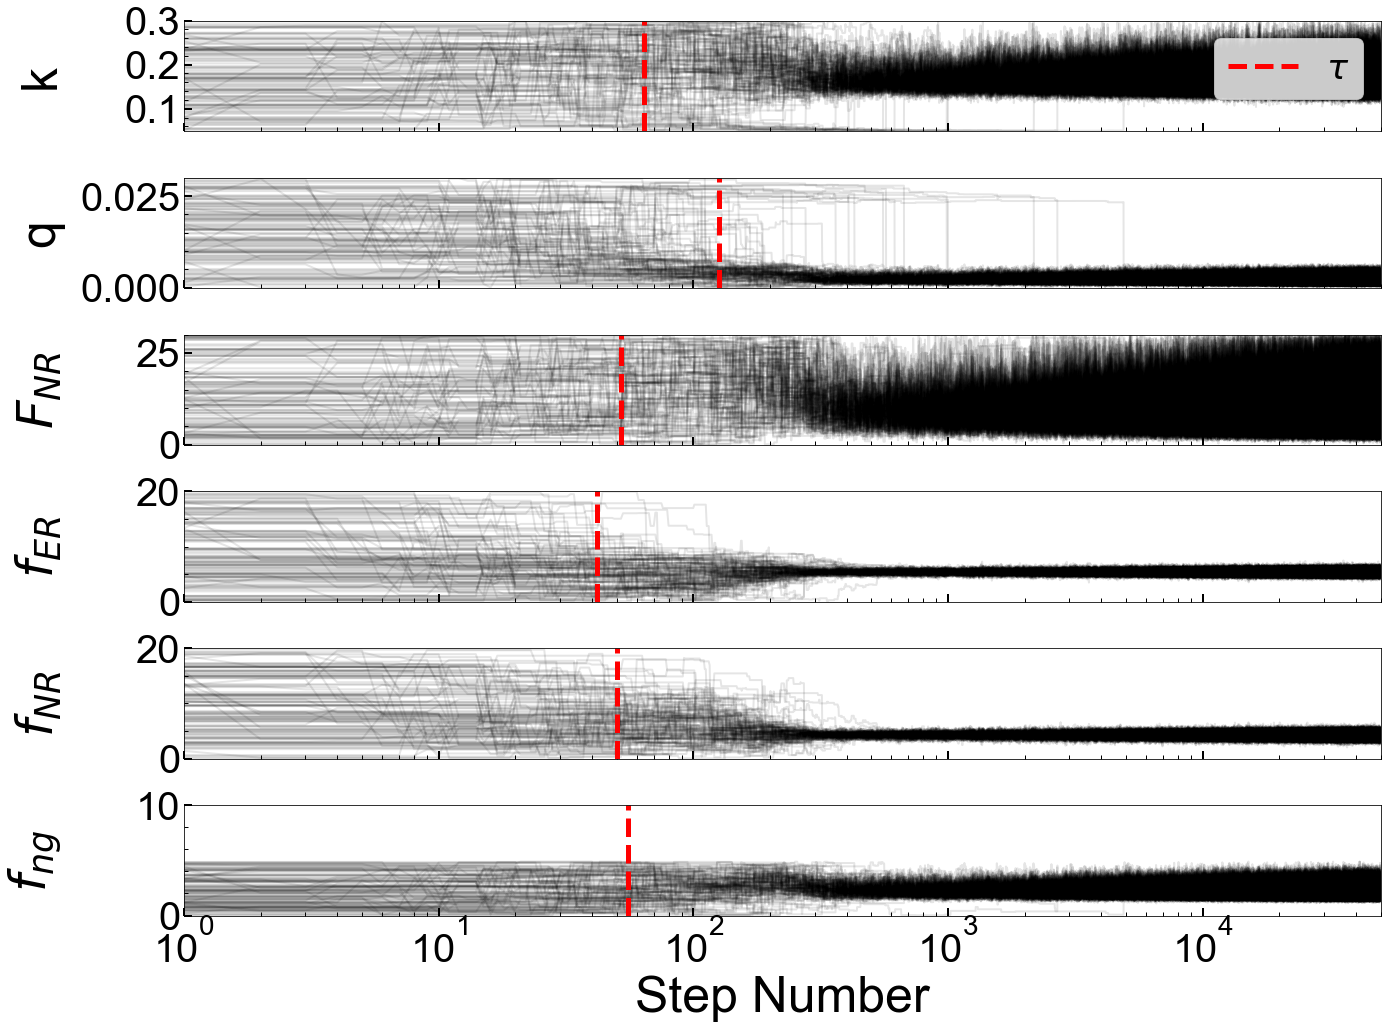

In [7]:
fig, axes = subplots(ndim, figsize=( 19.2, 14.4), sharex=True)
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:,:, i]/f_rescale[i], "k", alpha=0.1)
    
    ax.axvline(mcmc_data['RQs']['taus'][i],color='r',linestyle='--',linewidth='5',label=r'$\tau$')
    
    ax.set_xlim(1, len(samples))
    ax.set_ylim(*(mcmc_data['bounds'][i]))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("Step Number");
axes[-1].set_xscale("log");
axes[0].legend(loc='upper right')

fig.tight_layout()
plt.savefig("figures/mcmc_Sor_128walk_50kstep_SNorm_v4_chains.pdf")
plt.show()